In [1]:
import pandas as pd # good for reading data and manipulating tables of data 
import matplotlib.pyplot as plt # the general plotting library
import numpy as np # for general math stuff
#import matplotlib.patches as mpatches
from itertools import cycle, islice
from statsmodels.stats.anova import AnovaRM
from scipy import stats
import scipy.stats as ss 
import scikit_posthocs as sp

## Start: Loading in the data

First we have to read in our data using panda dataframes

In [2]:
# for just one person 
path = "../data/Fragebogen.xlsx"

codes = pd.read_excel(path)
codes

ID  aufgabe condition  F1  F2  F3  F4  F5  F6  F7  ...  gender  \
0   TA09BE        1         A   3   6   2  11   4   5  12  ...       m   
1   TA09BE        2         B   9   8  13   9  14   3   7  ...       m   
2   TA09BE        3         D  11   5  15   7   9   6   4  ...       m   
3   TA09BE        4         C   7   3   4   6   5   1  12  ...       m   
4   LU07NI        1         B   3   3  10  12   9   3  12  ...       m   
..     ...      ...       ...  ..  ..  ..  ..  ..  ..  ..  ...     ...   
59  GA06MA        4         A   4   4   1  14  13   5  15  ...       w   
60  DI09XA        1         D  12   3   1  12  12   3   6  ...       w   
61  DI09XA        2         A   6   3   1  15  12   1  15  ...       w   
62  DI09XA        3         C  12   3   1   8  10   3  15  ...       w   
63  DI09XA        4         B  10   3  14   7  12   1   4  ...       w   

    watcher   w1   w2   w3   bot   b1   b2   b3                usage  
0        Ja  3.0  3.0  1.0    Ja  3.0  3.0  1.0      Einmal im Monat  
1        Ja  3.0  3.0  1.0    Ja  3.0  3.0  1.0      Einmal im Monat  
2        Ja  3.0  3.0  1.0    Ja  3.0  3.0  1.0      Einmal im Monat  
3        Ja  3.0  3.0  1.0    Ja  3.0  3.0  1.0      Einmal im Monat  
4        Ja  3.0  4.0  3.0    Ja  3.0  3.0  4.0      Einmal im Monat  
..      ...  ...  ...  ...   ...  ...  ...  ...                  ...  
59       Ja  2.0  3.0  2.0  Nein  NaN  NaN  NaN  Einmal in der Woche  
60       Ja  2.0  4.0  2.0  Nein  NaN  NaN  NaN  Einmal in der Woche  
61       Ja  2.0  4.0  2.0  Nein  NaN  NaN  NaN  Einmal in der Woche  
62       Ja  2.0  4.0  2.0  Nein  NaN  NaN  NaN  Einmal in der Woche  
63       Ja  2.0  4.0  2.0  Nein  NaN  NaN  NaN  Einmal in der Woche  

[64 rows x 26 columns]

## Looking at individual Columns and how they play together
For every question (F1 to F7) I will first look at the mean answer (along with some other metrics) over all participants and then look at the averages across conditions (A, B, C, and D) and exercises (1-4).

#### F1: How mentally challenging did you perceive the task to be?

In [3]:
df = codes[["F1"]]
print(df.describe())

              F1
count  64.000000
mean    5.640625
std     3.661759
min     1.000000
25%     3.000000
50%     4.000000
75%     9.000000
max    13.000000


In [4]:
df = codes[["condition","F1"]]
df.groupby('condition').describe()

F1                                              
          count    mean       std  min   25%  50%   75%   max
condition                                                    
A          16.0  6.2500  3.660601  2.0  3.00  5.0  9.25  13.0
B          16.0  4.7500  3.696846  1.0  2.75  3.0  6.75  12.0
C          16.0  6.3750  3.739430  1.0  2.75  6.5  9.50  12.0
D          16.0  5.1875  3.637192  1.0  3.00  3.5  5.50  13.0

In [5]:
df = codes[["condition","F1"]]
df.groupby('condition').mean().plot.bar(color='cornflowerblue',legend=False)
plt.title('How mentally challenging did you perceive the task to be?')
plt.xlabel('conditions')
plt.ylabel('participant answer')
plt.ylim(1, 15)
plt.show()

<AxesSubplot:title={'center':'How mentally demanding did you perceive the task to be?'}, xlabel='condition', ylabel='participant answer'>

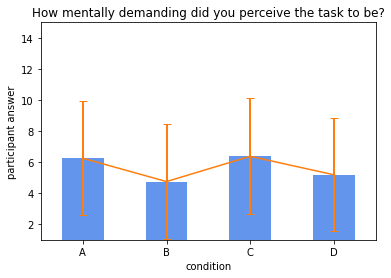

In [6]:
df = codes[['condition','F1']]
gp3 = df.groupby('condition')
means = gp3.mean()
errors = gp3.std()
fig, ax = plt.subplots()
means.plot.line(ax=ax, color="tab:orange", legend=False)
means.plot.bar(title = "How mentally demanding did you perceive the task to be?",legend=False,ylabel='participant answer',ylim=(1,15),yerr=errors, ax=ax, capsize=4, rot=0, color=['cornflowerblue'],error_kw=dict(ecolor='tab:orange',lw=2))

In [9]:
df = codes[['ID','condition','F1']]
print(df)
print(AnovaRM(data=df, depvar='F1', subject='ID', within=['condition']).fit())



        ID condition  F1
0   TA09BE         A   3
1   TA09BE         B   9
2   TA09BE         D  11
3   TA09BE         C   7
4   LU07NI         B   3
..     ...       ...  ..
59  GA06MA         A   4
60  DI09XA         D  12
61  DI09XA         A   6
62  DI09XA         C  12
63  DI09XA         B  10

[64 rows x 3 columns]
                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
condition  0.9151 3.0000 45.0000 0.4412



In [19]:
condition = 'aufgabe'
code = 'F1'
df = codes[[condition,code]]
print(df)
a_count = df[df[condition]==1][code].values
b_count = df[df[condition]==2][code].values
c_count = df[df[condition]==3][code].values
d_count = df[df[condition]==4][code].values
print(a_count)


print(ss.friedmanchisquare(a_count, b_count, c_count, d_count))
print(sp.posthoc_nemenyi_friedman(np.array([a_count, b_count, c_count, d_count]).T))
print(sp.posthoc_ttest(np.array([a_count, b_count, c_count, d_count])))

    aufgabe  F1
0         1   3
1         2   9
2         3  11
3         4   7
4         1   3
..      ...  ..
59        4   4
60        1  12
61        2   6
62        3  12
63        4  10

[64 rows x 2 columns]
[ 3  3  2  3  2  3  3  3  4  1  4  3  6  6  2 12]
FriedmanchisquareResult(statistic=8.036496350364958, pvalue=0.045263427286456416)
          0         1         2         3
0  1.000000  0.045834  0.554984  0.394338
1  0.045834  1.000000  0.554984  0.708703
2  0.554984  0.554984  1.000000  0.900000
3  0.394338  0.708703  0.900000  1.000000
          1         2         3         4
1  1.000000  0.001943  0.155947  0.068178
2  0.001943  1.000000  0.159037  0.228486
3  0.155947  0.159037  1.000000  0.786472
4  0.068178  0.228486  0.786472  1.000000


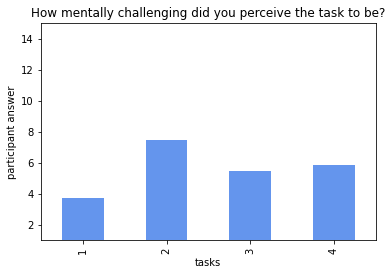

In [722]:
df = codes[["aufgabe","F1"]]
df.groupby('aufgabe').mean().plot.bar(color='cornflowerblue',legend=False)
plt.title('How mentally challenging did you perceive the task to be?')
plt.xlabel('tasks')
plt.ylabel('participant answer')
plt.ylim(1, 15)
plt.show()

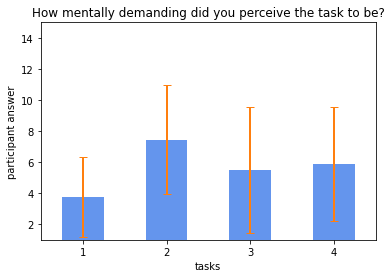

In [726]:
df = codes[['aufgabe','F1']]
gp3 = df.groupby('aufgabe')
means = gp3.mean()
errors = gp3.std()
fig, ax = plt.subplots()
#means.plot.line(ax=ax, color="tab:orange", legend=False)
means.plot.bar(title = "How mentally demanding did you perceive the task to be?",legend=False,ylabel='participant answer',ylim=(1,15),yerr=errors, ax=ax, capsize=4, rot=0, color=['cornflowerblue'],error_kw=dict(ecolor='tab:orange',lw=2))
plt.xlabel('tasks')
plt.show()

In [626]:
df = codes[['ID','aufgabe','F1']]
print(AnovaRM(data=df, depvar='F1', subject='ID', within=['aufgabe']).fit())

                Anova
        F Value Num DF  Den DF Pr > F
-------------------------------------
aufgabe  3.9190 3.0000 45.0000 0.0144



#### F2: How physically challenging did you perceive the task to be?

In [627]:
df = codes[["F2"]]
print(df.describe())

            F2
count 64.00000
mean   3.07812
std    2.22043
min    1.00000
25%    1.75000
50%    2.50000
75%    4.00000
max   10.00000


In [628]:
df = codes[["condition","F2"]]
df.groupby('condition').describe()

F2                                                         
             count    mean     std     min     25%     50%     75%      max
condition                                                                  
A         16.00000 3.68750 2.44182 1.00000 2.00000 3.00000 4.50000 10.00000
B         16.00000 2.37500 1.78419 1.00000 1.00000 2.00000 3.00000  8.00000
C         16.00000 3.43750 2.80401 1.00000 1.75000 2.50000 3.50000  9.00000
D         16.00000 2.81250 1.60078 1.00000 1.75000 2.50000 4.00000  6.00000

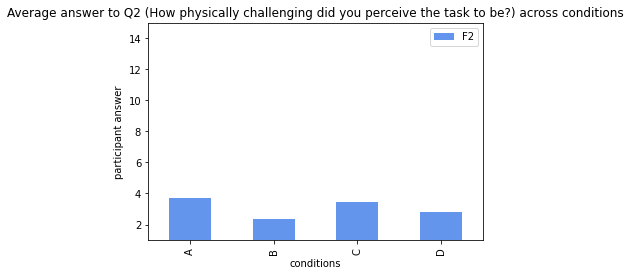

In [629]:
df = codes[["condition","F2"]]
df.groupby('condition').mean().plot.bar(color='cornflowerblue')
plt.title('Average answer to Q2 (How physically challenging did you perceive the task to be?) across conditions')
plt.xlabel('conditions')
plt.ylabel('participant answer')
plt.ylim(1, 15)
plt.show()

In [630]:
df = codes[["condition","F2"]]
df.groupby('condition').mean().plot.bar(color='cornflowerblue')
plt.title('How physically challenging did you perceive the task to be?')
plt.xlabel('conditions')
plt.ylabel('participant answer')
plt.ylim(1, 15)
plt.show()

In [631]:
df = codes[['condition','F2']]
gp3 = df.groupby('condition')
means = gp3.mean()
errors = gp3.std()
fig, ax = plt.subplots()
means.plot.line(ax=ax, color="tab:orange", legend=False)
means.plot.bar(title = "How physically demanding did you perceive the task to be?",legend=False,ylabel='participant answer',ylim=(1,15),yerr=errors, ax=ax, capsize=4, rot=0, color=['cornflowerblue'],error_kw=dict(ecolor='tab:orange',lw=2))

<AxesSubplot:title={'center':'How physically demanding did you perceive the task to be?'}, xlabel='condition', ylabel='participant answer'>

In [632]:
df = codes[["aufgabe","F2"]]
df.groupby('aufgabe').mean().plot.bar(color='cornflowerblue')
plt.title('Average answer to F2 (How physically challenging did you perceive the task to be?) across tasks')
plt.xlabel('tasks')
plt.ylabel('participant answer')
plt.show()

#### F3: temporal demand

In [633]:
df = codes[["F3"]]
print(df.describe())

            F3
count 64.00000
mean   4.70312
std    4.33399
min    1.00000
25%    1.00000
50%    2.50000
75%    8.25000
max   15.00000


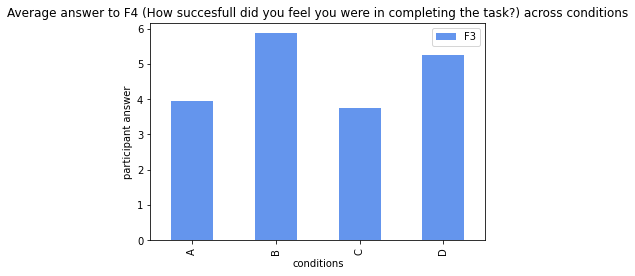

In [634]:
df = codes[["condition","F3"]]
df.groupby('condition').mean().plot.bar(color='cornflowerblue')
plt.title('Average answer to F4 (How succesfull did you feel you were in completing the task?) across conditions')
plt.xlabel('conditions')
plt.ylabel('participant answer')
plt.show()

In [635]:
df = codes[['ID','condition','F3']]
print(AnovaRM(data=df, depvar='F3', subject='ID', within=['condition']).fit())

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
condition  1.1506 3.0000 45.0000 0.3391



#### F4: How succesfull did you feel you were in completing the task?

In [636]:
df = codes[["F4"]]
print(df.describe())

            F4
count 64.00000
mean  10.03125
std    2.88383
min    1.00000
25%    9.00000
50%   10.00000
75%   12.00000
max   15.00000


In [637]:
df = codes[["condition","F4"]]
df.groupby('condition').describe()

F4                                                            
             count     mean     std     min     25%      50%      75%      max
condition                                                                     
A         16.00000 10.62500 3.22232 5.00000 8.50000 10.50000 13.25000 15.00000
B         16.00000  9.12500 3.64920 1.00000 8.50000 10.00000 11.25000 14.00000
C         16.00000 10.25000 2.35230 6.00000 8.75000 10.00000 12.25000 14.00000
D         16.00000 10.12500 2.09364 5.00000 9.00000 10.00000 11.25000 13.00000

In [638]:
df = codes[["condition","F4"]]
df.groupby('condition').mean().plot.bar(color='cornflowerblue')
plt.title('Average answer to F4 (How succesfull did you feel you were in completing the task?) across conditions')
plt.xlabel('conditions')
plt.ylabel('participant answer')
plt.show()

#### F5 aka "How hard did you try?"

In [639]:
df = codes[["F5"]]
print(df.describe())

            F5
count 64.00000
mean  10.10938
std    2.61932
min    3.00000
25%    9.00000
50%   10.00000
75%   12.00000
max   15.00000


In [640]:
df = codes[["condition","F5"]]
df.groupby('condition').describe()

F5                                                            
             count     mean     std     min     25%      50%      75%      max
condition                                                                     
A         16.00000 10.43750 2.73176 4.00000 9.75000 10.50000 12.00000 15.00000
B         16.00000  9.75000 2.95522 3.00000 8.75000 11.00000 11.25000 14.00000
C         16.00000 10.00000 2.33809 5.00000 9.00000 10.00000 11.25000 13.00000
D         16.00000 10.25000 2.62043 6.00000 8.75000 10.00000 12.00000 15.00000

In [641]:
df = codes["F5"]
df.sort_values()
plt.hist(df)

(array([ 3.,  1.,  2.,  5.,  3., 19., 11., 11.,  5.,  4.]),
 array([ 3. ,  4.2,  5.4,  6.6,  7.8,  9. , 10.2, 11.4, 12.6, 13.8, 15. ]),
 <BarContainer object of 10 artists>)

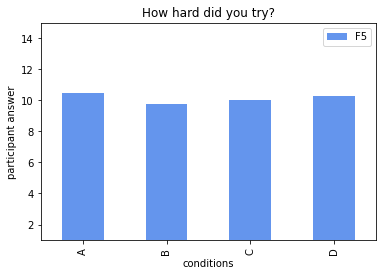

In [642]:
df = codes[["condition","F5"]]
df.groupby('condition').mean().plot.bar(color='cornflowerblue')
plt.title('How hard did you try?')
plt.xlabel('conditions')
plt.ylabel('participant answer')
plt.ylim(1, 15)
plt.show()

<AxesSubplot:title={'center':'How hard did you work to accomplish your level of performance?'}, xlabel='condition', ylabel='participant answer'>

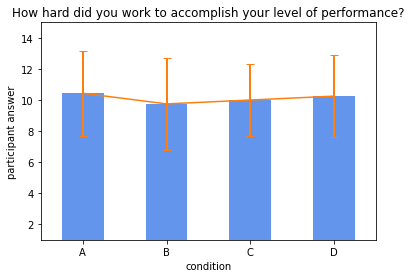

In [643]:
df = codes[['condition','F5']]
gp3 = df.groupby('condition')
means = gp3.mean()
errors = gp3.std()
fig, ax = plt.subplots()
means.plot.line(ax=ax, color="tab:orange", legend=False)
means.plot.bar(title = "How hard did you work to accomplish your level of performance?", legend=False,ylabel='participant answer',ylim=(1,15),yerr=errors, ax=ax, capsize=4, rot=0, color=['cornflowerblue'],error_kw=dict(ecolor='tab:orange',lw=2))

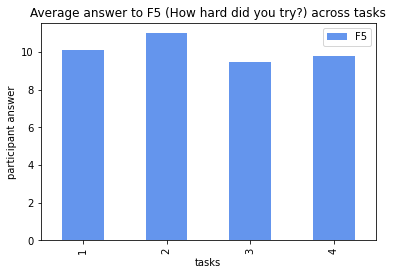

In [644]:
df = codes[["aufgabe","F5"]]
df.groupby('aufgabe').mean().plot.bar(color='cornflowerblue')
plt.title('Average answer to F5 (How hard did you try?) across tasks')
plt.xlabel('tasks')
plt.ylabel('participant answer')
plt.show()

In [645]:
df = codes[['ID','condition','F5']]
print(AnovaRM(data=df, depvar='F5', subject='ID', within=['condition']).fit())

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
condition  0.2460 3.0000 45.0000 0.8637



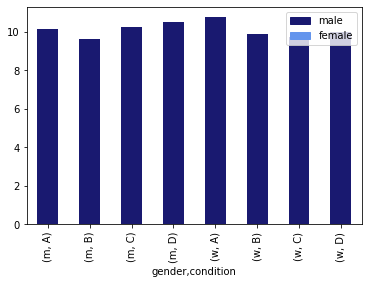

In [646]:
df = codes[["condition","gender","F5"]]
my_colors = list(islice(cycle(['midnightblue', 'cornflowerblue']), None, len(df)))
df.groupby(['gender','condition']).mean().plot.bar(color=my_colors, legend=True)
first_patch = mpatches.Patch(color='midnightblue', label='male')
scnd_patch = mpatches.Patch(color='cornflowerblue', label='female')

plt.legend(handles=[first_patch,scnd_patch])

#### F6 aka "How unsure, discouraged, irritated or annoyed were you?"¶

In [647]:
df = codes[["F6"]]
print(df.describe())

            F6
count 64.00000
mean   4.00000
std    3.19722
min    1.00000
25%    2.00000
50%    3.00000
75%    5.00000
max   15.00000


In [648]:
df = codes[["condition","F6"]]
df.groupby('condition').describe()

F6                                                         
             count    mean     std     min     25%     50%     75%      max
condition                                                                  
A         16.00000 4.37500 3.70360 1.00000 1.75000 3.00000 5.50000 11.00000
B         16.00000 3.37500 3.30404 1.00000 2.00000 3.00000 3.25000 15.00000
C         16.00000 4.12500 2.82548 1.00000 2.75000 3.50000 4.25000 12.00000
D         16.00000 4.12500 3.11716 1.00000 2.00000 3.00000 5.25000 13.00000

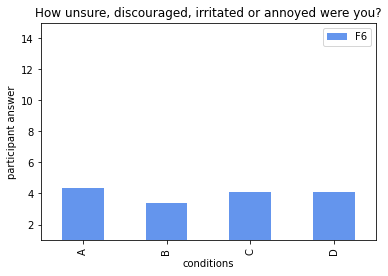

In [649]:
df = codes[["condition","F6"]]
df.groupby('condition').mean().plot.bar(color='cornflowerblue')
plt.title('How unsure, discouraged, irritated or annoyed were you?')
plt.xlabel('conditions')
plt.ylabel('participant answer')
plt.ylim(1, 15)
plt.show()

<AxesSubplot:title={'center':'How unsure, discouraged, irritated or annoyed were you?'}, xlabel='condition', ylabel='participant answer'>

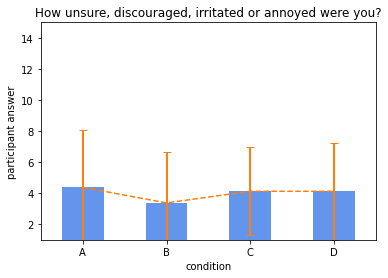

In [650]:
df = codes[['condition','F6']]
gp3 = df.groupby('condition')
means = gp3.mean()
errors = gp3.std()
fig, ax = plt.subplots()
means.plot.line(ax=ax,style ="--", color="tab:orange", legend=False)
means.plot.bar(title = "How unsure, discouraged, irritated or annoyed were you?",legend=False,ylabel='participant answer',ylim=(1,15),yerr=errors, ax=ax, capsize=4, rot=0, color=['cornflowerblue'],error_kw=dict(ecolor='tab:orange',lw=2))

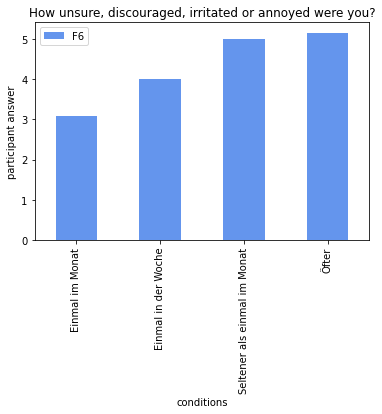

In [651]:
df = codes[["usage","F6"]]
df.groupby('usage').mean().plot.bar(color='cornflowerblue')
plt.title('How unsure, discouraged, irritated or annoyed were you?')
plt.xlabel('conditions')
plt.ylabel('participant answer')
plt.show()

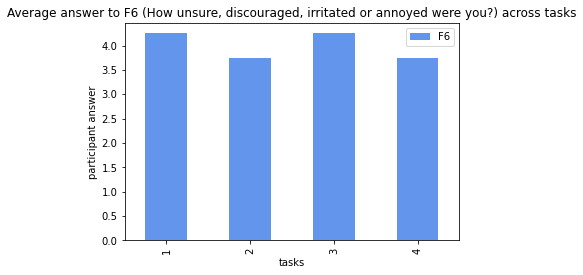

In [652]:
df = codes[["aufgabe","F6"]]
df.groupby('aufgabe').mean().plot.bar(color='cornflowerblue')
plt.title('Average answer to F6 (How unsure, discouraged, irritated or annoyed were you?) across tasks')
plt.xlabel('tasks')
plt.ylabel('participant answer')
plt.show()

<AxesSubplot:xlabel='gender,condition'>

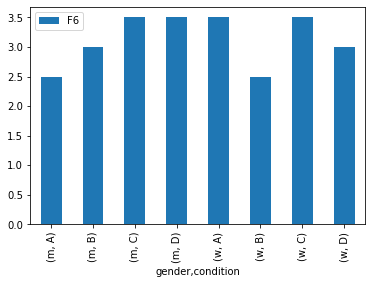

In [653]:
df = codes[["condition","gender","F6"]]
df.groupby(['gender','condition']).median().plot.bar()

In [654]:
df = codes[['ID','condition','F6']]
print(AnovaRM(data=df, depvar='F6', subject='ID', within=['condition']).fit())

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
condition  0.3689 3.0000 45.0000 0.7758



In [655]:
df = codes[['ID','condition','F6']]
filter_df = df[codes['gender']=='w']
print(AnovaRM(data=filter_df, depvar='F6', subject='ID', within=['condition']).fit())

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
condition  0.3677 3.0000 21.0000 0.7771



#### F7: Were you able to finish the task?

In [656]:
df = codes[["F7"]]
print(df.describe())

            F7
count 64.00000
mean  10.32812
std    4.05147
min    2.00000
25%    7.75000
50%   12.00000
75%   14.00000
max   15.00000


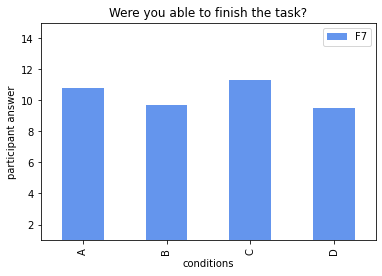

In [657]:
df = codes[["condition","F7"]]
df.groupby('condition').mean().plot.bar(color='cornflowerblue')
plt.title('Were you able to finish the task?')
plt.xlabel('conditions')
plt.ylabel('participant answer')
plt.ylim(1, 15)
plt.show()

### Looking at task 2 seperately from the others

In [658]:
codes = pd.read_excel(path)
codes

ID  aufgabe condition  F1  F2  F3  F4  F5  F6  F7  ...  gender  \
0   TA09BE        1         A   3   6   2  11   4   5  12  ...       m   
1   TA09BE        2         B   9   8  13   9  14   3   7  ...       m   
2   TA09BE        3         D  11   5  15   7   9   6   4  ...       m   
3   TA09BE        4         C   7   3   4   6   5   1  12  ...       m   
4   LU07NI        1         B   3   3  10  12   9   3  12  ...       m   
..     ...      ...       ...  ..  ..  ..  ..  ..  ..  ..  ...     ...   
59  GA06MA        4         A   4   4   1  14  13   5  15  ...       w   
60  DI09XA        1         D  12   3   1  12  12   3   6  ...       w   
61  DI09XA        2         A   6   3   1  15  12   1  15  ...       w   
62  DI09XA        3         C  12   3   1   8  10   3  15  ...       w   
63  DI09XA        4         B  10   3  14   7  12   1   4  ...       w   

    watcher      w1      w2      w3   bot      b1      b2      b3  \
0        Ja 3.00000 3.00000 1.00000    Ja 3.00000 3.00000 1.00000   
1        Ja 3.00000 3.00000 1.00000    Ja 3.00000 3.00000 1.00000   
2        Ja 3.00000 3.00000 1.00000    Ja 3.00000 3.00000 1.00000   
3        Ja 3.00000 3.00000 1.00000    Ja 3.00000 3.00000 1.00000   
4        Ja 3.00000 4.00000 3.00000    Ja 3.00000 3.00000 4.00000   
..      ...     ...     ...     ...   ...     ...     ...     ...   
59       Ja 2.00000 3.00000 2.00000  Nein     NaN     NaN     NaN   
60       Ja 2.00000 4.00000 2.00000  Nein     NaN     NaN     NaN   
61       Ja 2.00000 4.00000 2.00000  Nein     NaN     NaN     NaN   
62       Ja 2.00000 4.00000 2.00000  Nein     NaN     NaN     NaN   
63       Ja 2.00000 4.00000 2.00000  Nein     NaN     NaN     NaN   

                  usage  
0       Einmal im Monat  
1       Einmal im Monat  
2       Einmal im Monat  
3       Einmal im Monat  
4       Einmal im Monat  
..                  ...  
59  Einmal in der Woche  
60  Einmal in der Woche  
61  Einmal in der Woche  
62  Einmal in der Woche  
63  Einmal in der Woche  

[64 rows x 26 columns]

In [659]:
filter_df = codes[['condition','F6','aufgabe']]
filter_df = filter_df[codes['aufgabe']!=2]
filter_df

condition  F6  aufgabe
0          A   5        1
2          D   6        3
3          C   1        4
4          B   3        1
6          A  11        3
7          D   3        4
8          C   2        1
10         B   2        3
11         A   1        4
12         D   6        1
14         C   1        3
15         B  15        4
16         A   3        1
18         D   3        3
19         C   5        4
20         B   2        1
22         A   2        3
23         D   1        4
24         C   3        1
26         B   2        3
27         A   2        4
28         D  13        1
30         C   7        3
31         B   3        4
32         A   1        1
34         D   1        3
35         C   4        4
36         B   1        1
38         A   1        3
39         D   1        4
40         C  12        1
42         B   3        3
43         A   7        4
44         D   5        1
46         C   8        3
47         B   5        4
48         A   3        1
50         D   3        3
51         C   4        4
52         B   2        1
54         A  11        3
55         D   2        4
56         C   4        1
58         B   4        3
59         A   5        4
60         D   3        1
62         C   3        3
63         B   1        4

<AxesSubplot:title={'center':'How unsure, discouraged, irritated or annoyed were you?'}, xlabel='condition', ylabel='participant answer'>

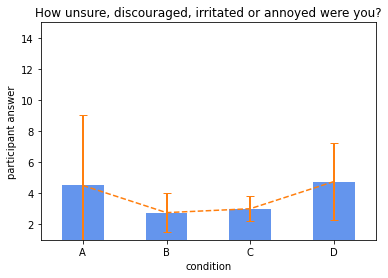

In [660]:
filter_df = codes[['condition','F6','aufgabe']]
filter_df = filter_df[codes['aufgabe']==2]
df = filter_df[['condition','F6']]
gp3 = df.groupby('condition')
means = gp3.mean()
errors = gp3.std()
fig, ax = plt.subplots()
means.plot.line(ax=ax,style ="--", color="tab:orange", legend=False)
means.plot.bar(title = "How unsure, discouraged, irritated or annoyed were you?",legend=False,ylabel='participant answer',ylim=(1,15),yerr=errors, ax=ax, capsize=4, rot=0, color=['cornflowerblue'],error_kw=dict(ecolor='tab:orange',lw=2))

In [661]:
filter_df = codes[['condition','F6','aufgabe']]
filter_df = filter_df[codes['aufgabe']!=2]
df = filter_df[['condition','F6']]
gp3 = df.groupby('condition')
means = gp3.mean()
errors = gp3.std()
fig, ax = plt.subplots()
means.plot.line(ax=ax,style ="--", color="tab:orange", legend=False)
means.plot.bar(title = "How unsure, discouraged, irritated or annoyed were you?",legend=False,ylabel='participant answer',ylim=(1,15),yerr=errors, ax=ax, capsize=4, rot=0, color=['cornflowerblue'],error_kw=dict(ecolor='tab:orange',lw=2))

<AxesSubplot:title={'center':'How unsure, discouraged, irritated or annoyed were you?'}, xlabel='condition', ylabel='participant answer'>

### Next let's look at how the amount of written words and conditions play together

In [662]:

codes['words'].describe()

count    64.00000
mean    279.54688
std      78.68925
min      98.00000
25%     242.00000
50%     287.50000
75%     340.25000
max     409.00000
Name: words, dtype: float64

In [663]:
df = codes[["ID","condition","words"]]
print(AnovaRM(data=df, depvar='words', subject='ID', within=['condition']).fit())

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
condition  0.4258 3.0000 45.0000 0.7354



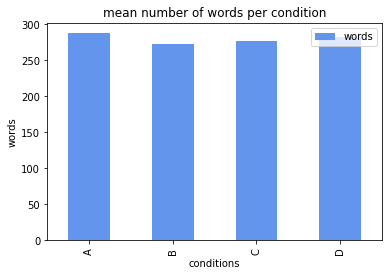

In [4]:
df = codes[["condition","words"]]
df.groupby('condition').mean().plot.bar(color='cornflowerblue')
plt.title('mean number of words per condition')
plt.xlabel('conditions')
plt.ylabel('words')
plt.show()

In [16]:
df = codes[["condition","words"]]
print(df.groupby('condition'))
print(df[df['condition']=='A']['words'].values)

[138 351 382 246 352 304 405 272 330 314 250 242 340 132 272 273]


In [24]:
df = codes[["aufgabe","words"]]
print(df)
a_count = df[df['aufgabe']==1]['words'].values
b_count = df[df['aufgabe']==2]['words'].values
c_count = df[df['aufgabe']==3]['words'].values
d_count = df[df['aufgabe']==4]['words'].values
print(a_count)


print(ss.friedmanchisquare(a_count, b_count, c_count, d_count))
print(sp.posthoc_nemenyi_friedman(np.array([a_count, b_count, c_count, d_count]).T))
print(sp.posthoc_ttest(np.array([a_count, b_count, c_count, d_count])))

    aufgabe  words
0         1    138
1         2    144
2         3    157
3         4     98
4         1    376
..      ...    ...
59        4    272
60        1    208
61        2    273
62        3    283
63        4    226

[64 rows x 2 columns]
[138 376 364 298 352 349 402 352 330 315 251 242 340 156 358 208]
FriedmanchisquareResult(statistic=7.6792452830188624, pvalue=0.053127400532715155)
          0         1         2         3
0  1.000000  0.065622  0.862424  0.193413
1  0.065622  1.000000  0.317621  0.900000
2  0.862424  0.317621  1.000000  0.593413
3  0.193413  0.900000  0.593413  1.000000
          1         2         3         4
1  1.000000  0.164328  0.601600  0.226342
2  0.164328  1.000000  0.350106  0.979595
3  0.601600  0.350106  1.000000  0.420645
4  0.226342  0.979595  0.420645  1.000000


In [5]:
df_words = codes.groupby("condition").agg([np.mean, np.std])
df_words = df_words["words"]
df_words

C:\Users\Janik\AppData\Local\Temp\ipykernel_53668\3047947614.py:1: FutureWarning: ['ID', 'start', 'stop', 'gender', 'watcher', 'bot', 'usage'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_words = codes.groupby("condition").agg([np.mean, np.std])


mean        std
condition                     
A          287.6875  76.978541
B          272.3750  87.070757
C          276.4375  76.858284
D          281.6875  80.320789

In [666]:
df_words = df_words.sort_values('condition',ascending=False)

<ErrorbarContainer object of 3 artists>

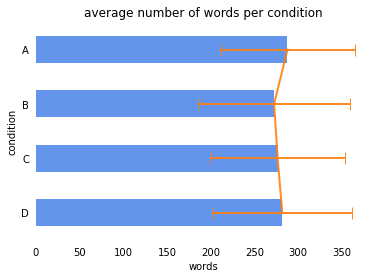

In [667]:
ax = df_words.plot(kind = "barh", y = "mean", legend = False, title = "average number of words per condition",color="cornflowerblue") # no error bars added here
# X
ax.set_xlabel("words")
# Y
# Overall
for key, spine in ax.spines.items():
    spine.set_visible(False)
ax.tick_params(bottom = False, left = False)
ax.errorbar(df_words["mean"], df_words.index, xerr = df_words["std"], 
            linewidth = 2, color = "tab:orange", alpha = 0.9, capsize = 6)

In [668]:
df = codes[['condition','words']]
gp3 = df.groupby('condition')
means = gp3.mean()
errors = gp3.std()
fig, ax = plt.subplots()
means.plot.line(ax=ax, color="tab:orange", legend=False)
means.plot.bar(title = "average number of words per condition",legend=False,yerr=errors, ax=ax, capsize=4, rot=0, color=['cornflowerblue'],error_kw=dict(ecolor='tab:orange',lw=2))

<AxesSubplot:title={'center':'average number of words per condition'}, xlabel='condition'>

<AxesSubplot:xlabel='aufgabe'>

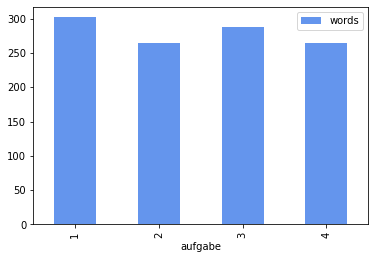

In [669]:
df = codes[["aufgabe","words"]]
df.groupby('aufgabe').mean().plot.bar(color='cornflowerblue')

In [670]:
options = ['C','D']
df = codes[['condition','words','F6','watcher']]
filter_df = df[codes['condition'].isin(options)]
filter_df = filter_df[codes['watcher']=='Ja']
filter_df

<ipython-input-670-967242a2ec2e>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filter_df = filter_df[codes['watcher']=='Ja']


condition  words  F6 watcher
2          D    157   6      Ja
3          C     98   1      Ja
5          C    305   4      Ja
7          D    409   3      Ja
8          C    364   2      Ja
9          D    389   2      Ja
12         D    298   6      Ja
14         C    260   1      Ja
18         D    300   3      Ja
19         C    248   5      Ja
21         C    287   2      Ja
23         D    274   1      Ja
24         C    402   3      Ja
25         D    345   4      Ja
28         D    352  13      Ja
30         C    301   7      Ja
34         D    318   1      Ja
35         C    250   4      Ja
37         C    288   3      Ja
39         D    316   1      Ja
40         C    251  12      Ja
41         D    234   8      Ja
44         D    242   5      Ja
46         C    267   8      Ja
50         D    337   3      Ja
51         C    326   4      Ja
56         C    358   4      Ja
57         D    190   5      Ja
60         D    208   3      Ja
62         C    283   3      Ja

In [671]:
#filter by conditions you want included
options = ['A','C','D','B']
#selecting all the relevant columns
df = codes[['condition','words','watcher','w1','w2','w3']]
#apply condition filter
filter_df = df[codes['condition'].isin(options)]
#only include people who noticed the watcher
filter_df = filter_df[codes['watcher']=='Ja']
filter_df

condition  words watcher      w1      w2      w3
0          A    138      Ja 3.00000 3.00000 1.00000
1          B    144      Ja 3.00000 3.00000 1.00000
2          D    157      Ja 3.00000 3.00000 1.00000
3          C     98      Ja 3.00000 3.00000 1.00000
4          B    376      Ja 3.00000 4.00000 3.00000
5          C    305      Ja 3.00000 4.00000 3.00000
6          A    351      Ja 3.00000 4.00000 3.00000
7          D    409      Ja 3.00000 4.00000 3.00000
8          C    364      Ja 2.00000 3.00000 3.00000
9          D    389      Ja 2.00000 3.00000 3.00000
10         B    341      Ja 2.00000 3.00000 3.00000
11         A    382      Ja 2.00000 3.00000 3.00000
12         D    298      Ja 3.00000 4.00000 2.00000
13         A    246      Ja 3.00000 4.00000 2.00000
14         C    260      Ja 3.00000 4.00000 2.00000
15         B    156      Ja 3.00000 4.00000 2.00000
16         A    352      Ja 2.00000 2.00000 4.00000
17         B    262      Ja 2.00000 2.00000 4.00000
18         D    300      Ja 2.00000 2.00000 4.00000
19         C    248      Ja 2.00000 2.00000 4.00000
20         B    349      Ja 3.00000 3.00000 1.00000
21         C    287      Ja 3.00000 3.00000 1.00000
22         A    304      Ja 3.00000 3.00000 1.00000
23         D    274      Ja 3.00000 3.00000 1.00000
24         C    402      Ja 2.00000 4.00000 3.00000
25         D    345      Ja 2.00000 4.00000 3.00000
26         B    408      Ja 2.00000 4.00000 3.00000
27         A    405      Ja 2.00000 4.00000 3.00000
28         D    352      Ja 1.00000 1.00000 3.00000
29         A    272      Ja 1.00000 1.00000 3.00000
30         C    301      Ja 1.00000 1.00000 3.00000
31         B    316      Ja 1.00000 1.00000 3.00000
32         A    330      Ja 2.00000 2.00000 3.00000
33         B    342      Ja 2.00000 2.00000 3.00000
34         D    318      Ja 2.00000 2.00000 3.00000
35         C    250      Ja 2.00000 2.00000 3.00000
36         B    315      Ja 3.00000 2.00000 2.00000
37         C    288      Ja 3.00000 2.00000 2.00000
38         A    314      Ja 3.00000 2.00000 2.00000
39         D    316      Ja 3.00000 2.00000 2.00000
40         C    251      Ja 3.00000 2.00000 1.00000
41         D    234      Ja 3.00000 2.00000 1.00000
42         B    320      Ja 3.00000 2.00000 1.00000
43         A    250      Ja 3.00000 2.00000 1.00000
44         D    242      Ja 1.00000 2.00000 2.00000
45         A    242      Ja 1.00000 2.00000 2.00000
46         C    267      Ja 1.00000 2.00000 2.00000
47         B    155      Ja 1.00000 2.00000 2.00000
48         A    340      Ja 2.00000 3.00000 2.00000
49         B    279      Ja 2.00000 3.00000 2.00000
50         D    337      Ja 2.00000 3.00000 2.00000
51         C    326      Ja 2.00000 3.00000 2.00000
56         C    358      Ja 2.00000 3.00000 2.00000
57         D    190      Ja 2.00000 3.00000 2.00000
58         B    213      Ja 2.00000 3.00000 2.00000
59         A    272      Ja 2.00000 3.00000 2.00000
60         D    208      Ja 2.00000 4.00000 2.00000
61         A    273      Ja 2.00000 4.00000 2.00000
62         C    283      Ja 2.00000 4.00000 2.00000
63         B    226      Ja 2.00000 4.00000 2.00000

<AxesSubplot:xlabel='w1'>

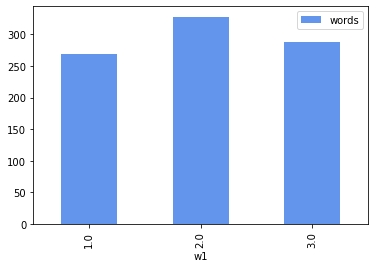

In [672]:
df = filter_df[['words','w1']]
df.groupby('w1').median().plot.bar(color='cornflowerblue')

<AxesSubplot:xlabel='w2'>

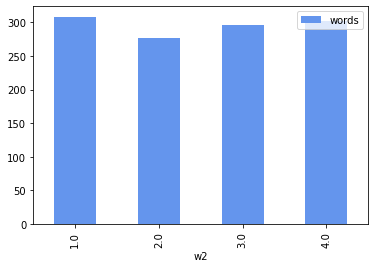

In [673]:
df = filter_df[['words','w2']]
df.groupby('w2').median().plot.bar(color='cornflowerblue')

<AxesSubplot:xlabel='w3'>

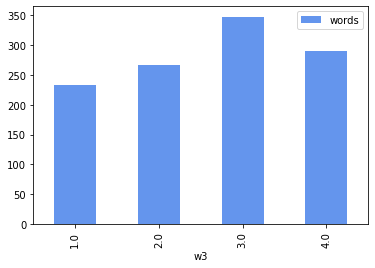

In [674]:
df = filter_df[['words','w3']]
df.groupby('w3').mean().plot.bar(color='cornflowerblue')

In [675]:
options = ['A','B','c','D']
df = codes[["condition","ID","w3","words"]]
filter_df = df[df['condition'].isin(options)]
stats.ttest_rel(df.dropna()['words'], df.dropna()['w3'])

Ttest_relResult(statistic=30.959668404641043, pvalue=3.50803111900538e-38)

In [676]:
#filter by conditions you want included
options = ['D']
#selecting all the relevant columns
df = codes[['condition','words','bot','b1','b2','b3']]
#apply condition filter
filter_df = df[df['condition'].isin(options)]
#only include people who noticed the watcher
filter_df = filter_df[codes['bot']=='Ja']
filter_df

<ipython-input-676-a2c9ab9e0f63>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filter_df = filter_df[codes['bot']=='Ja']


condition  words bot      b1      b2      b3
2          D    157  Ja 3.00000 3.00000 1.00000
7          D    409  Ja 3.00000 3.00000 4.00000
12         D    298  Ja 1.00000 3.00000 2.00000
28         D    352  Ja 2.00000 2.00000 1.00000
34         D    318  Ja 1.00000 1.00000 3.00000
44         D    242  Ja 1.00000 2.00000 2.00000
50         D    337  Ja 4.00000 4.00000 2.00000

<AxesSubplot:xlabel='b1'>

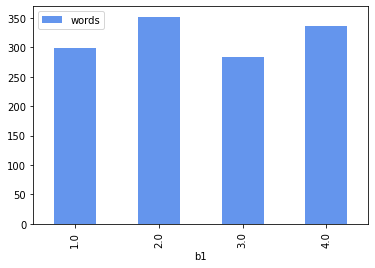

In [677]:
df = filter_df[['words','b1']]
df.groupby('b1').median().plot.bar(color='cornflowerblue')

<AxesSubplot:xlabel='b2'>

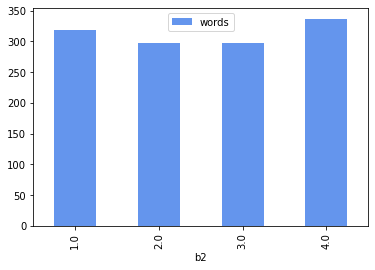

In [678]:
df = filter_df[['words','b2']]
df.groupby('b2').median().plot.bar(color='cornflowerblue')

In [679]:
df = codes[['words','b2']]
df = df[codes['bot']=='Ja']
print(stats.ttest_rel(df.dropna()['words'], df.dropna()['b2']).pvalue)

2.627942133203882e-16


<AxesSubplot:xlabel='b3'>

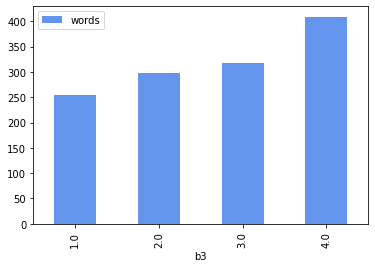

In [680]:
df = filter_df[['words','b3']]
df.groupby('b3').median().plot.bar(color='cornflowerblue')

In [681]:
df = codes[['words','b3']]
df = df[codes['bot']=='Ja']
print(stats.ttest_rel(df.dropna()['words'], df.dropna()['b3']).pvalue)

2.089109736175502e-16


### Typos & Grammar
Let's start with looking at the relation between typos/grammar and condition

In [738]:
df = codes[["typos","grammar"]]
df.describe()

typos  grammar
count 64.00000 64.00000
mean   2.53125  0.40625
std    3.66437  0.60994
min    0.00000  0.00000
25%    1.00000  0.00000
50%    2.00000  0.00000
75%    3.00000  1.00000
max   20.00000  2.00000

In [682]:
df = codes[["condition","typos","grammar"]]
df.groupby('condition').describe()

typos                                                           \
             count    mean     std     min     25%     50%     75%      max   
condition                                                                     
A         16.00000 2.25000 2.93258 0.00000 0.75000 1.00000 3.00000 11.00000   
B         16.00000 2.62500 4.66011 0.00000 0.00000 1.00000 2.25000 16.00000   
C         16.00000 1.93750 1.34009 0.00000 1.00000 2.00000 2.25000  5.00000   
D         16.00000 3.31250 4.81274 0.00000 1.00000 2.00000 3.00000 20.00000   

           grammar                                                          
             count    mean     std     min     25%     50%     75%     max  
condition                                                                   
A         16.00000 0.37500 0.50000 0.00000 0.00000 0.00000 1.00000 1.00000  
B         16.00000 0.37500 0.50000 0.00000 0.00000 0.00000 1.00000 1.00000  
C         16.00000 0.31250 0.60208 0.00000 0.00000 0.00000 0.25000 2.00000  
D         16.00000 0.56250 0.81394 0.00000 0.00000 0.00000 1.00000 2.00000

In [26]:
df = codes[["condition","grammar"]]
print(df)
a_count = df[df['condition']=='A']['grammar'].values
b_count = df[df['condition']=='B']['grammar'].values
c_count = df[df['condition']=='C']['grammar'].values
d_count = df[df['condition']=='D']['grammar'].values
print(a_count)


print(ss.friedmanchisquare(a_count, b_count, c_count, d_count))
print(sp.posthoc_nemenyi_friedman(np.array([a_count, b_count, c_count, d_count]).T))
print(sp.posthoc_ttest(np.array([a_count, b_count, c_count, d_count])))

   condition  grammar
0          A        0
1          B        1
2          D        1
3          C        0
4          B        0
..       ...      ...
59         A        1
60         D        0
61         A        0
62         C        0
63         B        0

[64 rows x 2 columns]
[0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0]
FriedmanchisquareResult(statistic=0.7411764705882032, pvalue=0.8634787024007314)
     0    1    2    3
0  1.0  0.9  0.9  0.9
1  0.9  1.0  0.9  0.9
2  0.9  0.9  1.0  0.9
3  0.9  0.9  0.9  1.0
          1         2         3         4
1  1.000000  1.000000  0.751608  0.438531
2  1.000000  1.000000  0.751608  0.438531
3  0.751608  0.751608  1.000000  0.331185
4  0.438531  0.438531  0.331185  1.000000


In [683]:
df = codes[["ID","condition","typos"]]
print(AnovaRM(data=df, depvar='typos', subject='ID', within=['condition']).fit())

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
condition  1.1479 3.0000 45.0000 0.3401



In [735]:
df = codes[["ID","condition","typos","grammar"]]
sum_column = df["typos"] + df["grammar"]
df["sum"] = sum_column
df

<ipython-input-735-00b3f85a2ad4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sum"] = sum_column


ID condition  typos  grammar  sum
0   TA09BE         A      1        0    1
1   TA09BE         B      1        1    2
2   TA09BE         D      2        1    3
3   TA09BE         C      0        0    0
4   LU07NI         B      0        0    0
..     ...       ...    ...      ...  ...
59  GA06MA         A      1        1    2
60  DI09XA         D      1        0    1
61  DI09XA         A      0        0    0
62  DI09XA         C      0        0    0
63  DI09XA         B      0        0    0

[64 rows x 5 columns]

In [745]:
df.groupby('condition').describe()

sum                                                         
             count    mean     std     min     25%     50%     75%      max
condition                                                                  
A         16.00000 2.62500 3.20156 0.00000 0.75000 2.00000 3.00000 12.00000
B         16.00000 3.00000 4.92612 0.00000 0.00000 1.00000 2.25000 17.00000
C         16.00000 2.25000 1.77012 0.00000 1.00000 2.00000 3.00000  7.00000
D         16.00000 3.87500 5.11045 0.00000 1.00000 2.50000 4.00000 21.00000

<ipython-input-741-afe6f9ae9aab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sum"] = sum_column


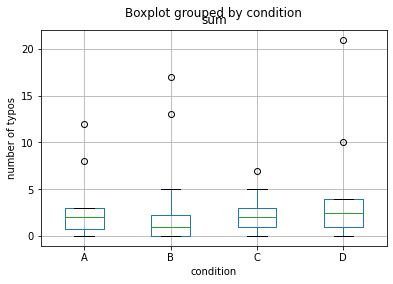

In [741]:
df = codes[["ID","condition","typos","grammar"]]
sum_column = df["typos"] + df["grammar"]
df["sum"] = sum_column
df = df[["condition","sum"]]
#df.groupby('condition').mean().plot.bar(color=['cornflowerblue','tab:orange'],legend=False)
df.boxplot(column=['sum'],by='condition')
#plt.title('Average amount of grammar mistakes and typos across conditions')
#plt.ylim([-2,6])
plt.xlabel('condition')
plt.ylabel('number of typos')
plt.show()

In [737]:
df = df[["ID","condition","sum"]]
print(AnovaRM(data=df, depvar='sum', subject='ID', within=['condition']).fit())

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
condition  1.6470 3.0000 45.0000 0.1919



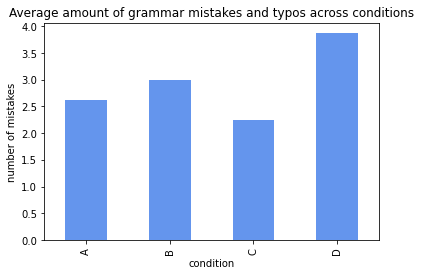

In [731]:
df = df[["condition","sum"]]
df.groupby('condition').mean().plot.bar(color=['cornflowerblue','tab:orange'],legend=False)
plt.title('Average amount of grammar mistakes and typos across conditions')
plt.xlabel('condition')
plt.ylabel('number of mistakes')
plt.show()

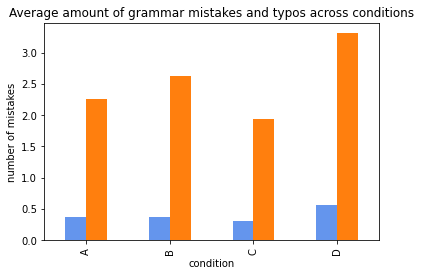

In [727]:
df = codes[["condition","grammar","typos"]]
df.groupby('condition').mean().plot.bar(color=['cornflowerblue','tab:orange'],legend=False)
plt.title('Average amount of grammar mistakes and typos across conditions')
plt.xlabel('condition')
plt.ylabel('number of mistakes')
plt.show()

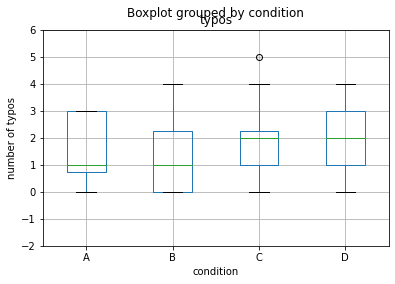

In [718]:
df = codes[["condition","grammar","typos"]]
#df.groupby('condition').mean().plot.bar(color=['cornflowerblue','tab:orange'],legend=False)
df.boxplot(column=['typos'],by='condition')
#plt.title('Average amount of grammar mistakes and typos across conditions')
plt.ylim([-2,6])
plt.xlabel('condition')
plt.ylabel('number of typos')
plt.show()

<AxesSubplot:title={'center':'average number of typos per condition'}, xlabel='condition'>

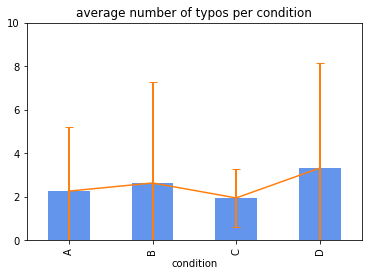

In [719]:
df = codes[['condition','typos']]
gp3 = df.groupby('condition')
means = gp3.mean()
errors = gp3.std()
fig, ax = plt.subplots()
means.plot.line(ax=ax, color="tab:orange", legend=False)
means.plot.bar(title = "average number of typos per condition",legend=False,yerr=errors,ylim=[0,10], ax=ax, capsize=4,  color=['cornflowerblue'],error_kw=dict(ecolor='tab:orange',lw=2))

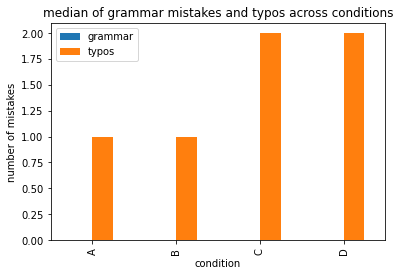

In [685]:
df = codes[["condition","grammar","typos"]]
df.groupby('condition').median().plot.bar()
plt.title('median of grammar mistakes and typos across conditions')
plt.xlabel('condition')
plt.ylabel('number of mistakes')
plt.show()

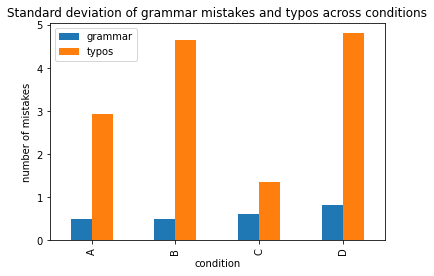

In [686]:
df = codes[["condition","grammar","typos"]]
df.groupby('condition').std().plot.bar()
plt.title('Standard deviation of grammar mistakes and typos across conditions')
plt.xlabel('condition')
plt.ylabel('number of mistakes')
plt.show()

#### Next let's look if there's a relationship between task and typos/grammar

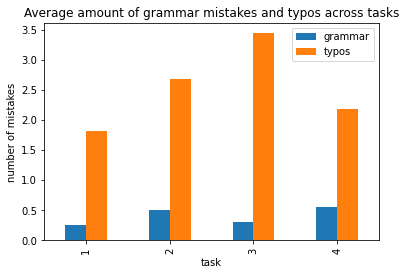

In [687]:
df = codes[["aufgabe","grammar","typos"]]
df.groupby('aufgabe').mean().plot.bar()
plt.title('Average amount of grammar mistakes and typos across tasks')
plt.xlabel('task')
plt.ylabel('number of mistakes')
plt.show()

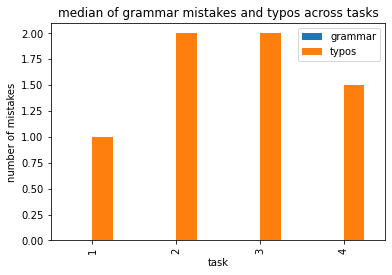

In [688]:
df = codes[["aufgabe","grammar","typos"]]
df.groupby('aufgabe').median().plot.bar()
plt.title('median of grammar mistakes and typos across tasks')
plt.xlabel('task')
plt.ylabel('number of mistakes')
plt.show()

#### and maybe between ussage of collaborative writing tools and typos/grammar

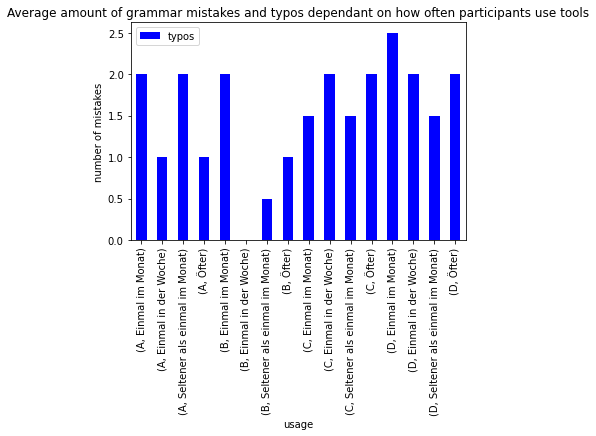

In [752]:
df = codes[["usage","condition","typos"]]
df.groupby(['condition','usage']).median().plot.bar(color=['blue','red','green','yellow'])
plt.title('Average amount of grammar mistakes and typos dependant on how often participants use tools')
plt.xlabel('usage')
plt.ylabel('number of mistakes')
plt.show()

<ipython-input-749-2d2d9cb90280>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sum"] = sum_column


<AxesSubplot:xlabel='condition,usage'>

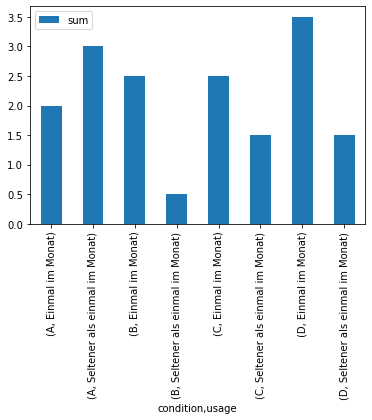

In [749]:
options1 = ['Seltener als einmal im Monat','Einmal im Monat']
options2 = ['Einmal in der Woche','Öfter']
df = codes[["ID","condition","typos","grammar","usage"]]
sum_column = df["typos"] + df["grammar"]
#rare_col = df[codes['usage'].isin(options1)]
#often_col = df[codes['usage'].isin(options2)]
df["sum"] = sum_column
filter_df = df[codes['usage'].isin(options1)]
filter_df = filter_df[['condition','usage','sum']]
filter_df.groupby(['condition','usage']).median().plot.bar()

<AxesSubplot:xlabel='condition,usage'>

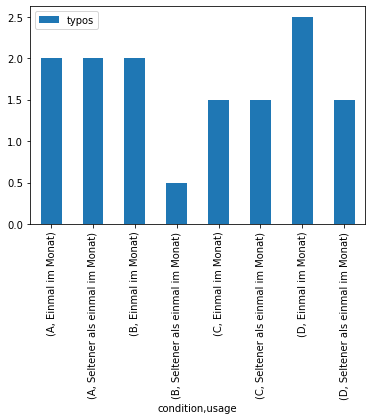

In [690]:
options = ['Seltener als einmal im Monat','Einmal im Monat']
df = codes[['condition','usage','typos']]
filter_df = df[codes['usage'].isin(options)]
filter_df.groupby(['condition','usage']).median().plot.bar()

(array([31., 23.,  4.,  1.,  1.,  1.,  1.,  0.,  1.,  1.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

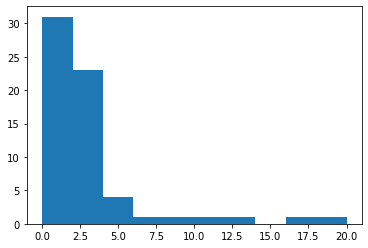

In [691]:
df = codes['typos']
plt.hist(df,bins=10)

In [692]:
df = codes[["w1","typos","grammar"]]
print(df)
df.groupby('w1').describe()

        w1  typos  grammar
0  3.00000      1        0
1  3.00000      1        1
2  3.00000      2        1
3  3.00000      0        0
4  3.00000      0        0
..     ...    ...      ...
59 2.00000      1        1
60 2.00000      1        0
61 2.00000      0        0
62 2.00000      0        0
63 2.00000      0        0

[64 rows x 3 columns]


typos                                                           \
           count    mean     std     min     25%     50%     75%      max   
w1                                                                          
1.00000  8.00000 0.75000 0.88641 0.00000 0.00000 0.50000 1.25000  2.00000   
2.00000 28.00000 4.07143 5.03270 0.00000 1.00000 2.00000 4.25000 20.00000   
3.00000 24.00000 1.45833 1.21509 0.00000 1.00000 1.00000 2.00000  4.00000   

         grammar                                                          
           count    mean     std     min     25%     50%     75%     max  
w1                                                                        
1.00000  8.00000 0.25000 0.46291 0.00000 0.00000 0.00000 0.25000 1.00000  
2.00000 28.00000 0.53571 0.69293 0.00000 0.00000 0.00000 1.00000 2.00000  
3.00000 24.00000 0.33333 0.56466 0.00000 0.00000 0.00000 1.00000 2.00000

In [693]:
df = codes[['words','w1']]
df = df[codes['watcher']=='Ja']
stats.ttest_rel(df.dropna()['words'], df.dropna()['w1'])

Ttest_relResult(statistic=30.74000773043809, pvalue=5.21236180422179e-38)

### Let' slook at backspace presses and conditions

In [694]:
backspace = [[['D', '766'], ['A', '742'], ['C', '805'], ['B', '695']], [['D', '1589'], ['A', '1253'], ['C', '1702'], ['B', '1554']], [['D', '1200'], ['A', '1081'], ['C', '997'], ['B', '1037']], [['D', '639'], ['A', '732'], ['C', '876'], ['B', '819']], [['B', '499'], ['C', '684'], ['A', '504'], ['D', '496']], [['C', '923'], ['D', '530'], ['B', '537'], ['A', '736']], [['C', '1268'], ['D', '1248'], ['B', '1377'], ['A', '1441']], [['B', '1166'], ['C', '1221'], ['A', '1215'], ['D', '1209']], [['C', '824'], ['D', '957'], ['B', '960'], ['A', '867']], [['B', '856'], ['C', '810'], ['A', '883'], ['D', '860']], [['C', '1036'], ['D', '1146'], ['B', '1274'], ['A', '1290']], [['A', '1085'], ['B', '922'], ['D', '932'], ['C', '889']], [['B', '1117'], ['C', '1207'], ['A', '1158'], ['D', '1262']], [['A', '1083'], ['B', '922'], ['D', '932'], ['C', '889']], [['A', '631'], ['B', '412'], ['D', '599'], ['C', '367']], [['A', '1066'], ['B', '962'], ['D', '942'], ['C', '863']]]
arr = np.concatenate(backspace)
df_key = pd.DataFrame({'condition': arr[:, 0], 'keypress': arr[:, 1]})
df_key['keypress'] = df_key['keypress'].astype(float)
print(df_key)

   condition   keypress
0          D  766.00000
1          A  742.00000
2          C  805.00000
3          B  695.00000
4          D 1589.00000
..       ...        ...
59         C  367.00000
60         A 1066.00000
61         B  962.00000
62         D  942.00000
63         C  863.00000

[64 rows x 2 columns]


<AxesSubplot:xlabel='condition'>

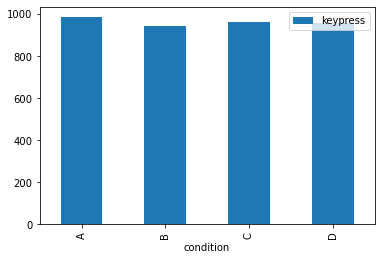

In [695]:
df_key.groupby('condition').mean().plot.bar()

df_key.groupby('condition').sum().plot.bar()

In [696]:
df_key.groupby('condition').describe()

keypress                                                     \
             count      mean       std       min       25%        50%   
condition                                                               
A         16.00000 985.43750 265.46261 504.00000 740.50000 1073.50000   
B         16.00000 944.31250 315.16826 412.00000 788.00000  941.00000   
C         16.00000 960.06250 294.67100 367.00000 820.50000  889.00000   
D         16.00000 956.68750 306.25756 496.00000 734.25000  937.00000   

                                 
                 75%        max  
condition                        
A         1172.25000 1441.00000  
B         1129.25000 1554.00000  
C         1078.75000 1702.00000  
D         1202.25000 1589.00000

In [697]:
ids = codes['ID']
df_key['id'] = ids
print(df_key)

   condition   keypress      id
0          D  766.00000  TA09BE
1          A  742.00000  TA09BE
2          C  805.00000  TA09BE
3          B  695.00000  TA09BE
4          D 1589.00000  LU07NI
..       ...        ...     ...
59         C  367.00000  GA06MA
60         A 1066.00000  DI09XA
61         B  962.00000  DI09XA
62         D  942.00000  DI09XA
63         C  863.00000  DI09XA

[64 rows x 3 columns]


In [698]:
print(AnovaRM(data=df_key, depvar='keypress', subject='id', within=['condition']).fit())

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
condition  0.4250 3.0000 45.0000 0.7360



## Let's also load in the survey

In [753]:
path = "../data/survey2.xlsx" # + vp + "/code_overview.xlsx"
vp = 'vp_1'
file = path + vp + "/code_overview.xlsx"

codes2 = pd.read_excel(path)
codes2

FileNotFoundError: [Errno 2] No such file or directory: '../data/survey2.xlsx'